In [14]:
%matplotlib inline

In [115]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import glob

import metpy.calc as mpcalc
from metpy.units import units

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo

from IPython.display import display,clear_output
import os
from datetime import datetime

In [149]:
ds1 = xr.open_dataset(r"C:\Users\Reese\Desktop\Work Data\enaaospsap3w1mC1.b1.20190303.000030.nc")
dsA = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\Work Data\*.nc")], dim='time')
dsA

<xarray.Dataset>
Dimensions:                 (bound: 2, time: 41760)
Coordinates:
  * time                    (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
Dimensions without coordinates: bound
Data variables: (12/30)
    base_time               (time) datetime64[ns] 2019-03-03 ... 2019-03-31
    time_offset             (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
    time_bounds             (time, bound) datetime64[ns] 2019-03-03 ... 2019-...
    sample_volume           (time) float32 1.125 1.125 1.125 ... 1.144 1.144
    qc_sample_volume        (time) int32 0 0 0 0 0 0 0 17 0 ... 0 0 0 0 0 0 0 0
    transmittance_blue      (time) float32 0.9187 0.9186 ... 0.9831 0.9829
    ...                      ...
    qc_sample_flow_rate     (time) int32 0 0 0 0 0 0 0 1 0 ... 0 0 0 0 0 0 0 0 0
    spot_size_area          (time) float32 17.5 17.5 17.5 ... 17.5 17.5 17.5
    impactor_state          (time) float64 10.0 10.0 10.0 ... 10.0 10.0 10.0
    lat                     (time) float32 39.09 39.09 39.09 ... 39.09 39.09
    lon                     (time) float32 -28.03 -28.03 ... -28.03 -28.03
    alt                     (time) float32 30.48 30.48 30.48 ... 30.48 30.48
Attributes: (12/19)
    command_line:             aospsap3w1m -s ena -f C1
    Conventions:              ARM-1.2
    process_version:          ingest-aospsap3w1m-1.1-0.el6
    dod_version:              aospsap3w1m-b1-1.1
    site_id:                  ena
    platform_id:              aospsap3w1m
    ...                       ...
    configuration_file:       enaaospsap3w1mC1.20131201.000000.config
    PSAP_Instrument:          Particle Soot Absorption Photometer
    Instrument_Manufacturer:  Radiance Research
    AOS_DAC_type:             D
    doi:                      10.5439/1225037
    history:                  created by user dsmgr on machine ruby at 2019-0...

Text(0, 0.5, 'Unitless')

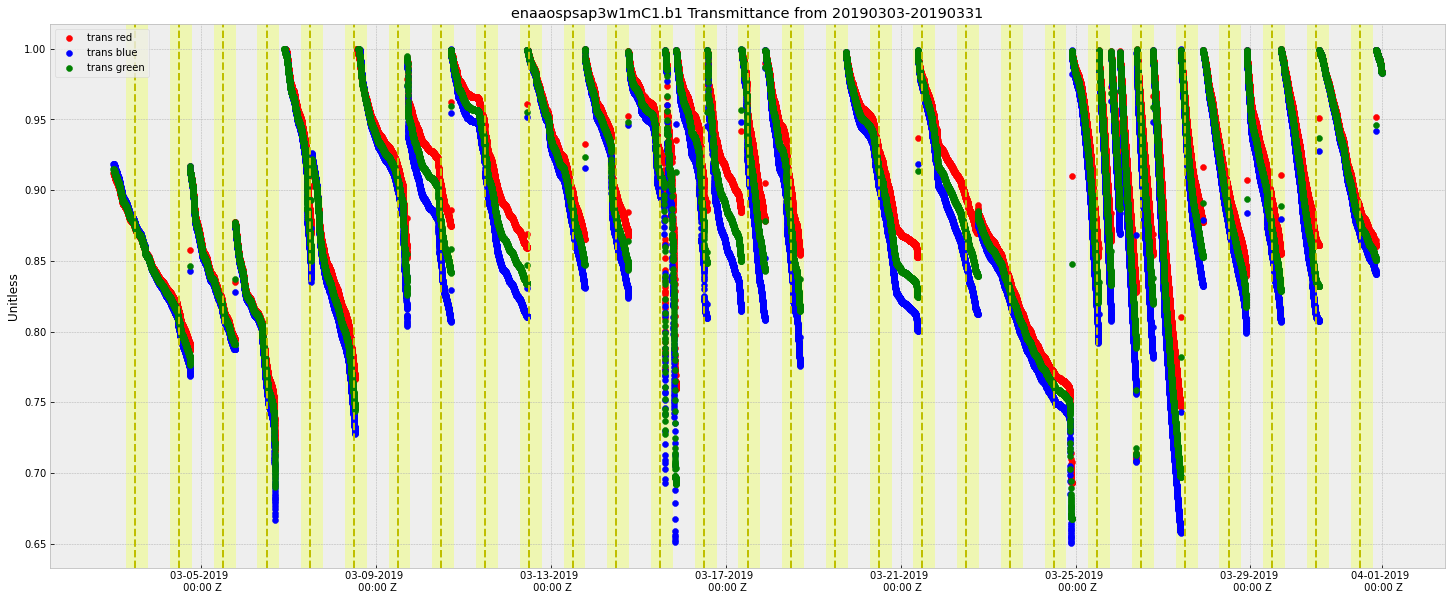

In [128]:
strt_day = 3
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.scatter(dsA['time'],dsA['transmittance_red'], color = 'red', label='trans red',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_blue'], color = 'blue', label='trans blue',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_green'], color = 'green', label='trans green',zorder=2)
ax.legend(loc='upper left')
# '{:0>2}'.format(3)
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T06:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T18:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T11:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax.set_title("enaaospsap3w1mC1.b1 Transmittance from 20190303-20190331")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('Unitless')

#Day starts at index 419 of time and ends 1139

Text(0, 0.5, '(L/min)')

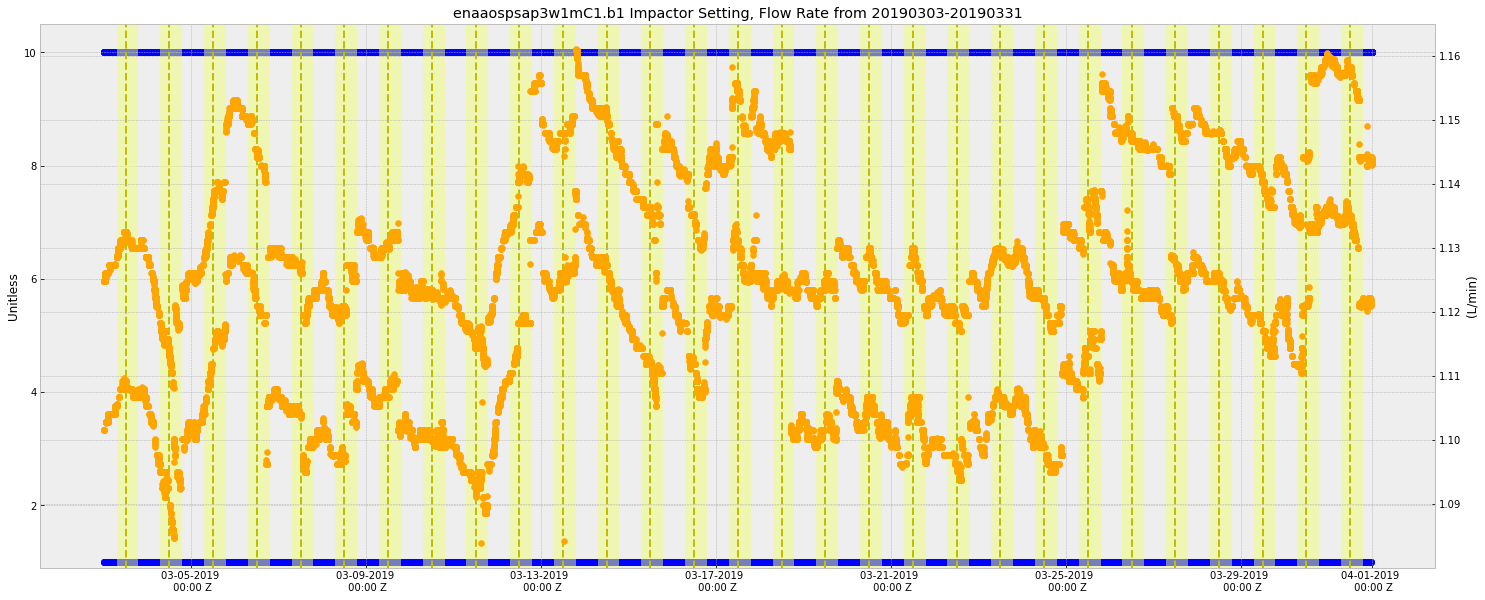

In [146]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax2 = ax1.twinx()
ax1.scatter(dsA['time'],dsA['impactor_state'], color = 'blue', label='impactor',zorder=1)
ax2.scatter(dsA['time'],dsA['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2)  
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T06:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T18:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T11:59:30.000000000', color='y', linestyle='--', zorder=0)
    counter += 1  
ax1.set_ylim(0.9,10.5)
ax1.set_title("enaaospsap3w1mC1.b1 Impactor Setting, Flow Rate from 20190303-20190331")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Unitless', color='black')
ax2.set_ylabel('(L/min)', color='black')

I'm trying to see why we might be seeing two different sampe flow rate lines but it looks like its the oscilation line. These do seem like very high values when I comepare with the current Houston instrument.

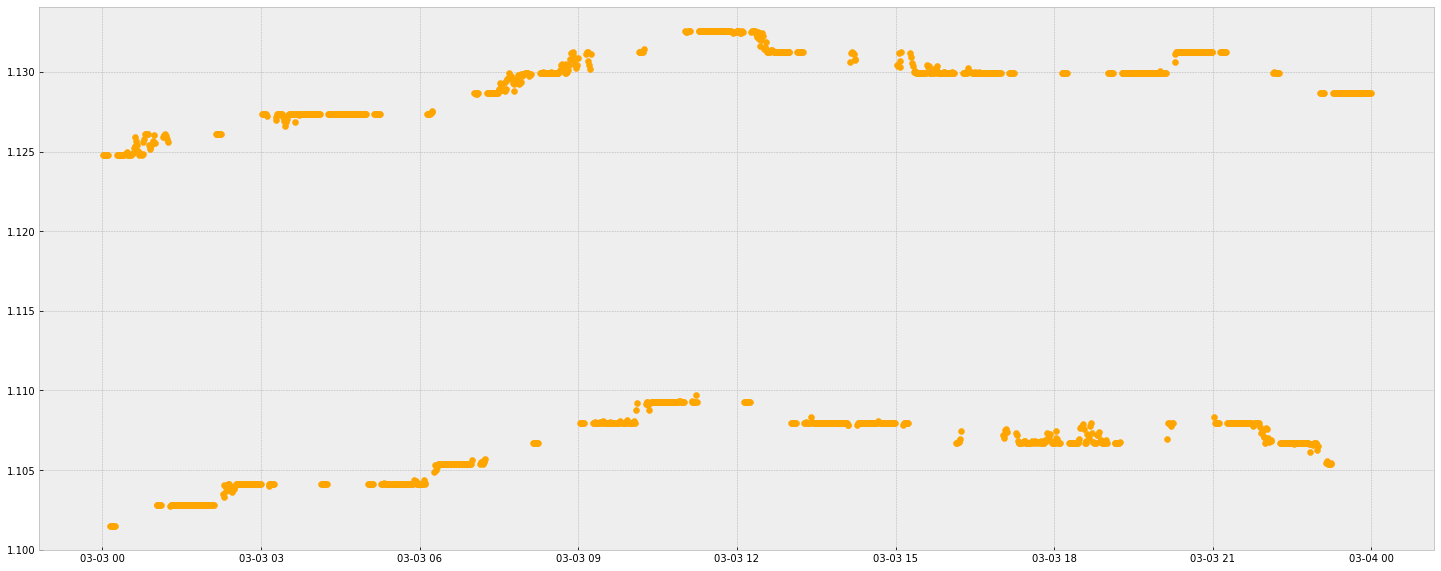

In [150]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.scatter(ds1['time'],ds1['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2) 

Okay, so it seems that we are seeing two lines are based on the impactor oscillation, so in the full mnth it just seems like two lines because of how closely spaced the data points have to be.

Adding an extra line to test that GitHub is picking up on changes!